In [10]:
import networkx as nx
import nx_cugraph as nxcg
# Import needed libraries
import os
import pickle as pkl
# Set environment variable
os.environ['NETWORKX_AUTOMATIC_BACKENDS'] = 'cugraph'

In [18]:
G = nx.Graph()
N = 20
i = 1
K = 4
graph_name = f'N={N}_{i}.pkl'
with open(os.path.join('.', 'test_dataset', graph_name), 'rb') as f:
    G = pkl.load(f)
candidate_graph = nx.random_regular_graph(K, N)

for u, v in candidate_graph.edges():
    candidate_graph.edges[u,v]['weight'] = G.edges[u,v]['weight']
    candidate_graph.edges[v,u]['weight'] = G.edges[v,u]['weight']

nxcg_G = nxcg.from_networkx(candidate_graph, preserve_all_attrs=True)       
# print(nxcg_G.edges(data=True))

In [19]:
length = dict(nx.all_pairs_bellman_ford_path_length(nxcg_G, weight='weight'))

/pscratch/sd/s/swu264/conda/rapids_raft/lib/python3.11/site-packages/cupy/cuda/compiler.py:233: PerformanceWarning: Jitify is performing a one-time only warm-up to populate the persistent cache, this may take a few seconds and will be improved in a future release...
  jitify._init_module()


In [20]:
overall_max_value = float('-inf')
for key, sub_dict in length.items():
    # Find the max value in each nested dictionary
    max_value = max(sub_dict.values())
    # Update the overall maximum if the current max is greater
    if max_value > overall_max_value:
        overall_max_value = max_value
print(overall_max_value)

19.0


torch.Size([100, 100])
torch.Size([100])
already_reshape


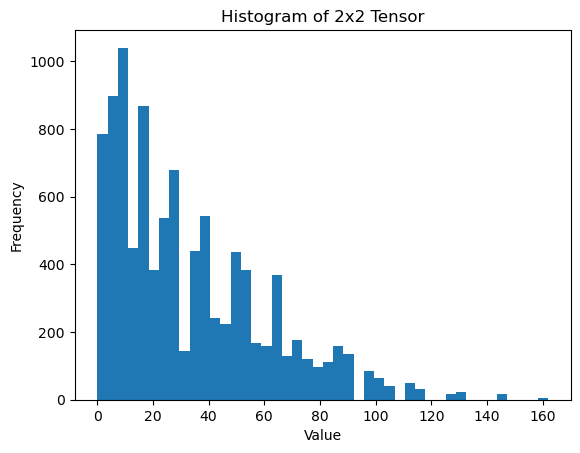

In [3]:
import torch as th
import matplotlib.pyplot as plt
m = 10
n = 10
K = 2
device = th.device("cuda:0")
x = th.zeros(m, n, K).to(device)
dis = th.zeros(m * n, m * n).to(device)

for i in range(m):
    for j in range(n):
        x[i][j][0] = i
        x[i][j][1] = j
x = x.reshape(-1, 2)
cross = x @ x.T
d1 = cross.diagonal()
print(cross.shape)
print(d1.shape)
# assert 0
xx = d1.repeat(m * n, 1)

fincal_dis = xx - 2 * cross + xx.T
# Step 3: Plot the histogram
fincal_dis = fincal_dis.reshape(-1)
# fincal_dis = fincal_dis / fincal_dis.sum()
print("already_reshape")
plt.hist(fincal_dis.cpu().numpy(), bins='auto')
plt.title('Histogram of 2x2 Tensor')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()